#### Questão 1

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts

In [190]:
# Criando o dataframe e visualizando as 5 primeiras linhas

titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [191]:
# Analisando os valores NaNs de cada feature

print(titanic.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


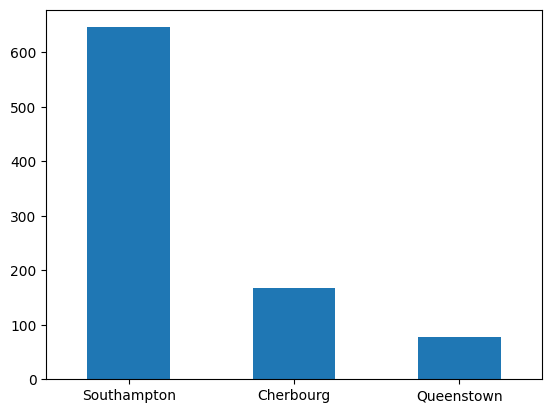

In [192]:
# A feature contém dois valores nulos, esses valores serão substituidos pela moda
# Criando o gráfico que relaciona a quantidade de pessoas embarcadas por cidade

moda = sts.mode(titanic['embark_town'])
titanic['embark_town'] = titanic['embark_town'].fillna(moda)
titanic['embark_town'].value_counts().plot.bar(rot = 0);


#### Questão 2

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

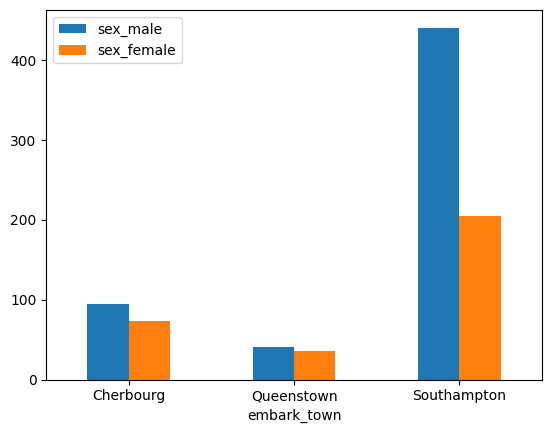

In [193]:
# As duas features não apresentam valores nulos, então não necessitam de tratamento
# Separando a coluna sexo com o get_dummies e plotando o gráfico

titanic.groupby(['embark_town', 'sex'])['sex'].count()
dum = pd.get_dummies(titanic, columns = ['sex'])
dum.groupby('embark_town')[['sex_male', 'sex_female']].sum().plot.bar(rot = 0);


#### Questão 3

Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

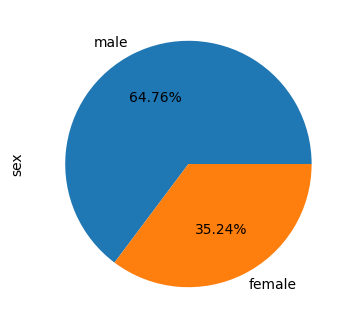

In [194]:
# Plotando o gráfico com percentuais da quantidade de pessoas por sexo

titanic['sex'].value_counts().plot.pie(figsize=(16,4), autopct='%.2f%%');

#### Questão 4

Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

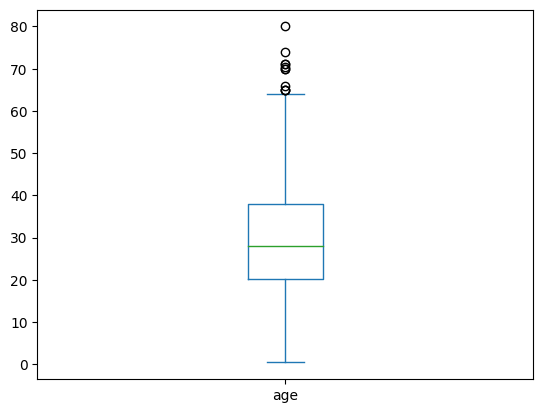

In [195]:
# Antes de fazer o tratamento dos números nulos são mais visíveis os outliers

titanic['age'].plot.box();

count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64
--------------------------------------------------
count    891.000000
mean      28.566970
std       13.199572
min        0.420000
25%       22.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64
--------------------------------------------------


C:\Users\lfili\AppData\Local\Temp\ipykernel_3276\2669999702.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  titanic.reset_index().pivot('index', ['sex'], 'age').plot.box(figsize=(16,6));


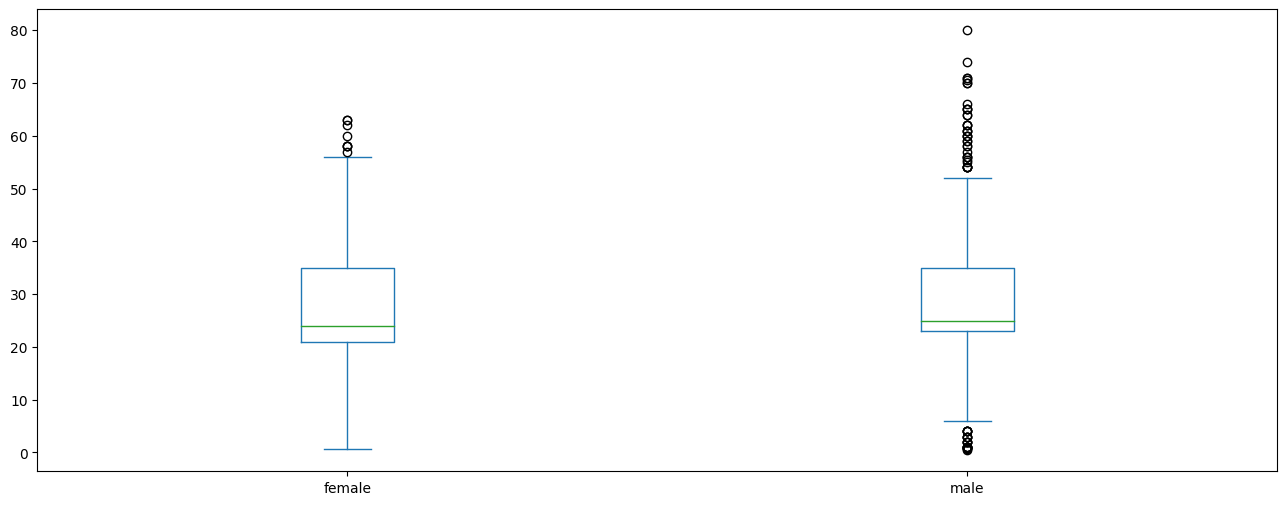

In [208]:
# Analisando a substituição dos outliers

print(titanic['age'].describe())

titanic['age'] = titanic['age'].fillna(0)

print('-' * 50)

# Pelo describe é compreensível trocar os valores nulos pela mediana

mediana = sts.median(titanic['age'])
titanic.loc[titanic['age'] == 0, 'age'] = mediana
print(titanic['age'].describe())
print('-' * 50)

# Visualizando os outliers separados por sexo

titanic.reset_index().pivot('index', ['sex'], 'age').plot.box(figsize=(16,6));

#### Questão 5

Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

In [221]:
titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

#### Questão 6

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

#### Questão 7

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.